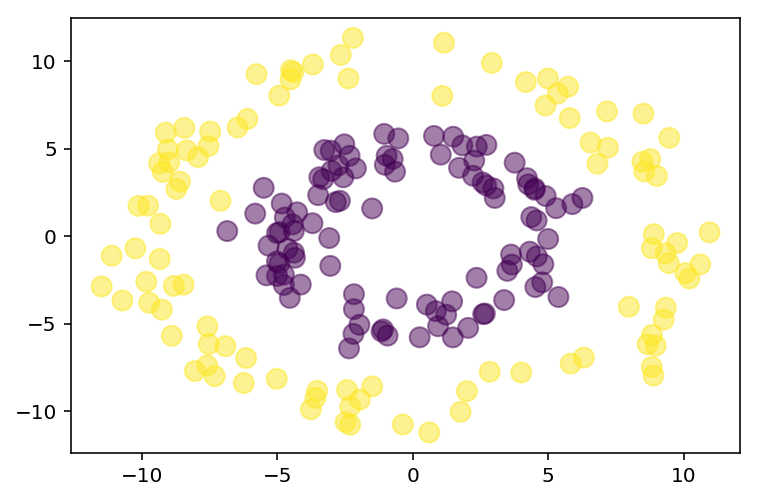

Accuracy:  0.5


In [1]:
from __future__ import absolute_import, division, print_function
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import time

from datetime import datetime
from sortedcollections import SortedList
from IPython import display

from util import *

class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self,X):
        y = np.zeros(len(X))
        for i, x in enumerate(self.X):
            sl = SortedList()
            for j, xd in enumerate(self.X):
                diff = xd - x
                d = diff.dot(diff)
                if len(sl)<self.k:
                    sl.add((d,self.y[j]))
                else:
                    if(sl[-1][0]<d):
                        del sl[-1]
                        sl.add((d,self. y[j]))
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v, 0) + 1
                max_votes = 0
                for v, count in votes.items():
                    if count>max_votes:
                        max_votes = count
                        max_votes_class = v
                y[i] = max_votes_class
        return y
    
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

if __name__ == '__main__':
    X, Y = get_donut()
    plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
    plt.show()
    model = KNN(3)
    model.fit(X, Y)
    print("Accuracy: ", model.score(X,Y))